# atep 
1load Library


In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df=pd.read_csv('tweets.csv',encoding='latin1', header=None)



```
# This is formatted as code
```



In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
1,1.0,1,RT @rssurjewala: Critical question: Was PayTM ...,FALSE,0,NaN,2016-11-23 18:40:30,FALSE,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,TRUE,FALSE
2,2.0,2,RT @Hemant_80: Did you vote on #Demonetization...,FALSE,0,NaN,2016-11-23 18:40:29,FALSE,NaN,801495654778413056,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,TRUE,FALSE
3,3.0,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",FALSE,0,NaN,2016-11-23 18:40:03,FALSE,NaN,801495544266821632,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,TRUE,FALSE
4,4.0,4,RT @ANI_news: Gurugram (Haryana): Post office ...,FALSE,0,NaN,2016-11-23 18:39:59,FALSE,NaN,801495527024160768,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,TRUE,FALSE


In [ ]:
df=df[[1,2]]
df.head()

,1,2
0,X,text
1,1,RT @rssurjewala: Critical question: Was PayTM ...
2,2,RT @Hemant_80: Did you vote on #Demonetization...
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...


In [ ]:
df.columns=['sr','twitts']
df.head()

,sr,twitts
0,X,text
1,1,RT @rssurjewala: Critical question: Was PayTM ...
2,2,RT @Hemant_80: Did you vote on #Demonetization...
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...


In [ ]:
df.count(0)

sr        14941
twitts    14941
dtype: int64

In [ ]:
df['word_count']=df['twitts'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

,sr,twitts,word_count
0,X,text,1
1,1,RT @rssurjewala: Critical question: Was PayTM ...,20
2,2,RT @Hemant_80: Did you vote on #Demonetization...,11
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",22
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,16


In [ ]:
df['char_count']=df['twitts'].apply(lambda x:len(x))

In [ ]:
df.head()

,sr,twitts,word_count,char_count
0,X,text,1,4
1,1,RT @rssurjewala: Critical question: Was PayTM ...,20,144
2,2,RT @Hemant_80: Did you vote on #Demonetization...,11,66
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",22,142
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,16,140


In [ ]:
def get_avg_word_len(x):
    words=x.split()
    char_len=0
    for word in words:
        char_len = char_len + len(word)
    return char_len/len(words) 

In [ ]:
df['avg_word_len']=df['twitts'].apply(lambda x: get_avg_word_len(x))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len
0,X,text,1,4,4.000000
1,1,RT @rssurjewala: Critical question: Was PayTM ...,20,144,6.200000
2,2,RT @Hemant_80: Did you vote on #Demonetization...,11,66,5.090909
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",22,142,5.318182
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,16,140,7.750000


In [ ]:
df['stop_words_len']=df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len
0,X,text,1,4,4.000000,0
1,1,RT @rssurjewala: Critical question: Was PayTM ...,20,144,6.200000,4
2,2,RT @Hemant_80: Did you vote on #Demonetization...,11,66,5.090909,3
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",22,142,5.318182,3
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,16,140,7.750000,2


In [ ]:
df['s']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mention_counts']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts
0,X,text,1,4,4.000000,0,0,0
1,1,RT @rssurjewala: Critical question: Was PayTM ...,20,144,6.200000,4,1,1
2,2,RT @Hemant_80: Did you vote on #Demonetization...,11,66,5.090909,3,1,1
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",22,142,5.318182,3,1,1
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,16,140,7.750000,2,1,1


In [ ]:
df['numeric_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count
0,X,text,1,4,4.000000,0,0,0,0
1,1,RT @rssurjewala: Critical question: Was PayTM ...,20,144,6.200000,4,1,1,0
2,2,RT @Hemant_80: Did you vote on #Demonetization...,11,66,5.090909,3,1,1,0
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",22,142,5.318182,3,1,1,0
4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,16,140,7.750000,2,1,1,0


In [ ]:
df['upper_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3 ]))

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.loc[4]['twitts']

'RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9\x85'

##Pre-Processing and Cleaning

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: x.lower())#lower case conversion

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count
0,X,text,1,4,4.000000,0,0,0,0,0
1,1,rt @rssurjewala: critical question: was paytm ...,20,144,6.200000,4,1,1,0,2
2,2,rt @hemant_80: did you vote on #demonetization...,11,66,5.090909,3,1,1,0,1
3,3,"rt @roshankar: former finsec, rbi dy governor,...",22,142,5.318182,3,1,1,0,3
4,4,rt @ani_news: gurugram (haryana): post office ...,16,140,7.750000,2,1,1,0,1


In [ ]:
construction={
    "ain't":"am not",
    "aren't":"are not"
}

In [ ]:
def cont_to_ext(x):
    if type(x) is str:
        for key in construction:
            value=construction[key]
            x=x.replace(key,value)
        return x
    else:
        return x    


In [ ]:
x="aren't you comming tomorrow"
cont_to_ext(x)

'are not you comming tomorrow'

In [ ]:
#%%time use for check the processing time 
df['twitts']=df['twitts'].apply(lambda x: cont_to_ext(x))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count
0,X,text,1,4,4.000000,0,0,0,0,0
1,1,rt @rssurjewala: critical question: was paytm ...,20,144,6.200000,4,1,1,0,2
2,2,rt @hemant_80: did you vote on #demonetization...,11,66,5.090909,3,1,1,0,1
3,3,"rt @roshankar: former finsec, rbi dy governor,...",22,142,5.318182,3,1,1,0,3
4,4,rt @ani_news: gurugram (haryana): post office ...,16,140,7.750000,2,1,1,0,1


In [ ]:
import re

In [ ]:
df['emails']=df['twitts'].apply(lambda x: re.findall('([\w]+@[\w]+)',x))


In [ ]:
df['emails_count']=df['emails'].apply(lambda x: len(x))

In [ ]:
df[df['emails_count']>0]

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count
3704,3704,only those are against #demonetization who ke...,13,105,7.000000,7,2,0,0,0,[themselves@aajtak],1
4815,4815,#demonetization is like pissing on pants on a ...,22,140,5.409091,6,1,0,1,0,[homework@forbes],1
4965,4965,@narendramodi@pmoindia \r\ni m sure u must hv ...,25,141,4.560000,7,1,1,0,0,[narendramodi@pmoindia],1
4984,4984,rt @hemantritu7: will fm@arunjaitley tell the ...,21,140,5.666667,6,1,1,0,2,[fm@arunjaitley],1
5004,5004,will fm@arunjaitley tell the nation who r thos...,19,139,6.368421,6,1,0,0,1,[fm@arunjaitley],1
5011,5011,after #demonetization pm@narendramodi ji's min...,16,137,7.625000,4,1,0,0,0,[pm@narendramodi],1
6200,6200,what about 70 who died due to ur mindless #dem...,15,127,7.466667,4,1,0,1,0,[bjp@alamgirizvi],1
6764,6764,day:5\r\n@hpcl @theofficialsbi @uppta1 @ashuto...,11,132,10.909091,0,0,7,0,3,[atm@sbbfs],1
9501,9501,"@narendramodi dear mr. modi, i'm a reporter in...",23,138,5.043478,9,0,1,0,2,[svaneksmith@npr],1
10022,10022,how modis party avoided the fallout from demo...,12,125,9.416667,2,0,0,0,0,[knowledge@wharton],1


In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count
0,X,text,1,4,4.000000,0,0,0,0,0,[],0
1,1,rt @rssurjewala: critical question: was paytm ...,20,144,6.200000,4,1,1,0,2,[],0
2,2,rt @hemant_80: did you vote on #demonetization...,11,66,5.090909,3,1,1,0,1,[],0
3,3,"rt @roshankar: former finsec, rbi dy governor,...",22,142,5.318182,3,1,1,0,3,[],0
4,4,rt @ani_news: gurugram (haryana): post office ...,16,140,7.750000,2,1,1,0,1,[],0


In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('([\w]+@[\w]+)','',x))

In [ ]:
df.head(-20)

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count
0,X,text,1,4,4.000000,0,0,0,0,0,[],0
1,1,rt @rssurjewala: critical question: was paytm ...,20,144,6.200000,4,1,1,0,2,[],0
2,2,rt @hemant_80: did you vote on #demonetization...,11,66,5.090909,3,1,1,0,1,[],0
3,3,"rt @roshankar: former finsec, rbi dy governor,...",22,142,5.318182,3,1,1,0,3,[],0
4,4,rt @ani_news: gurugram (haryana): post office ...,16,140,7.750000,2,1,1,0,1,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...
14916,14916,rt @rahulroushan: prohibition is demonetizatio...,20,140,6.000000,5,0,1,0,1,[],0
14917,14917,as someone who is trying to break into interne...,17,115,5.823529,8,0,0,0,0,[],0
14918,14918,rt @bharat_builder: lol. demonetization has fi...,19,139,6.315789,2,0,1,0,1,[],0
14919,14919,rt @rahulroushan: prohibition is demonetizatio...,20,140,6.000000,5,0,1,0,1,[],0


In [ ]:
df[df['emails_count']>0].head()
#df.loc[4815]['twitts']

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count
3704,3704,only those are against #demonetization who ke...,13,105,7.000000,7,2,0,0,0,[themselves@aajtak],1
4815,4815,#demonetization is like pissing on pants on a ...,22,140,5.409091,6,1,0,1,0,[homework@forbes],1
4965,4965,@ \r\ni m sure u must hv thought abt it n work...,25,141,4.560000,7,1,1,0,0,[narendramodi@pmoindia],1
4984,4984,rt @hemantritu7: will tell the nation who r t...,21,140,5.666667,6,1,1,0,2,[fm@arunjaitley],1
5004,5004,will tell the nation who r those current a/c ...,19,139,6.368421,6,1,0,0,1,[fm@arunjaitley],1


In [ ]:
url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

In [ ]:
df['urls']=df['twitts'].apply(lambda x: len(re.findall(url_regex,x)))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rt @rssurjewala: critical question: was paytm ...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,rt @hemant_80: did you vote on #demonetization...,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,"rt @roshankar: former finsec, rbi dy governor,...",22,142,5.318182,3,1,1,0,3,[],0,0
4,4,rt @ani_news: gurugram (haryana): post office ...,16,140,7.750000,2,1,1,0,1,[],0,1


In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(url_regex,"",x))

In [ ]:
#df.head(-100)
df.loc[14840]['twitts']

'rt @zennie62: youtube demonetization baseless as young turks get off scot free '

### REMOVE RT

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('rt'," ",x))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rssurjewala critical question was paytm info...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,hemant80 did you vote on demonetization on m...,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,roshankar former finsec rbi dy governor cbdt...,22,142,5.318182,3,1,1,0,3,[],0,0
4,4,aninews gurugram haryana post office employe...,16,140,7.750000,2,1,1,0,1,[],0,1


### Remove Special Charcters

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+',"",x))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rssurjewala critical question was paytm info...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,hemant80 did you vote on demonetization on m...,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,roshankar former finsec rbi dy governor cbdt...,22,142,5.318182,3,1,1,0,3,[],0,0
4,4,aninews gurugram haryana post office employe...,16,140,7.750000,2,1,1,0,1,[],0,1


### Remove Extra Spaces

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: " ".join(x.split()))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rssurjewala critical question was paytm inform...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,hemant80 did you vote on demonetization on mod...,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,roshankar former finsec rbi dy governor cbdt c...,22,142,5.318182,3,1,1,0,3,[],0,0
4,4,aninews gurugram haryana post office employees...,16,140,7.750000,2,1,1,0,1,[],0,1


## Remove HTML Tags

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
txt_xml="""<div class="navbar-header">
            <button type="button" class="navbar-toggle collapsed" data-toggle="collapse" data-target="#navbar" aria-expanded="false" aria-controls="navbar">
                <span class="sr-only">Toggle navigation</span>
                <span class="icon-bar"></span>
                <span class="icon-bar"></span>
                <span class="icon-bar"></span>
            </button>
            <a href="#" class="navbar-brand hidden-xs hidden-md hidden-sm" style="padding: 6px;">
                <img src="Assets/images/ab.png" id="Img1" class="img-responsive" /></a>
            <a href="#" class="navbar-brand visible-xs visible-md visible-sm">AIR UNIVERSITY</a>

        </div>
        <div id="navbar" class="navbar-collapse collapse ">
            <ul class="nav navbar-nav navbar-right">
                <li><a href="Default.aspx" id="A1">Home</a></li>
                <li><a href="Pages/About/Vision_Mission.aspx" id="A2">About</a></li>

                <li class="dropdown">
                    <a href="#" class="dropdown-toggle" data-toggle="dropdown" role="button" aria-haspopup="true" aria-expanded="false">Admission <span class="caret"></span></a>
                    <ul class="dropdown-menu">
                       <li>
                           <a href="Pages/Admission/Why_AU.aspx">Why Air University</a></li>
                                <li><a href="Pages/Admission/admission_schedule.aspx">Admission Schedule</a></li>
                                <li><a href="Pages/Admission/fees_financial.aspx">Fee & Financial Aid</a></li>
                                <li><a href="Pages/Admission/Scholarship.aspx">Scholarship</a></li>
                                <li><a href="Pages/Admission/eligibility_criteria.aspx">Eligibility Criteria</a></li>
                                <li><a href="Pages/Admission/required_documents.aspx">Required Documents</a></li>
                                <li><a href="Pages/Admission/how_to_apply.aspx">How to Apply</a></li>
                                <li><a href="Pages/Admission/prepare_adm_test.aspx">Prepare for Admission Test</a></li>
                                <li><a href="Pages/Admission/late_admission.aspx">Late Admission</a></li>
                                <li><a href="Pages/Admission/transfer-students.aspx">Transfer Students</a></li>

                    </ul>
                </li>
       <li><a href="Pages/Admission/Scholarship.aspx">Scholarship</a></li>
       <li class="dropdown">
                    <a href="#" class="dropdown-toggle" data-toggle="dropdown" role="button" aria-haspopup="true" aria-expanded="false">Faculties <span class="caret"></span></a>
                    <ul class="dropdown-menu">
                         <li><a href="Pages/Faculties/DASSS/Departments/AerospaceSciences/dept_aerospace_about.aspx" id="A10">Faculty Aerospaces Sciences & Strategic Studies</a></li>
                        <li><a href="Pages/Faculties/IAA/iaa.aspx" id="A9">Faculty of Avionics and Aeronautics</a></li>
                        <li><a href="Pages/Faculties/Basic_Applied_Sciences/faclty_applied_about.aspx" id="A7">Faculty of Basic & Applied Sciences</a></li>
                         
                           <li><a href="Pages/Faculties/Computing_AI/fact_cs_dean_msg.aspx" id="A6">Faculty of Computing & Artificial Intelligence</a></li>
                         <li><a href="Pages/Faculties/Engineering/faculty_engineering_about.aspx" id="A4">Faculty of Engineering</a></li>
                            <li><a href="http://au.edu.pk/ausom/">Air University School of Management</a></li>
                            <li><a href="Pages/Faculties/SocialSciences/academics_faculty_social_sciences.aspx" id="A8">Faculty of Social Sciences</a></li>
                            
                           
                           
                           <!--<li><a href="Pages/Faculties/Mechatronics_Biomedical_Engineering/Departments/faculty_mechatronics_biomedical_about.aspx" id="A5">Faculty of Mechatronics and Biomedical Engineering</a></li>-->
                               
                                
                                
                                
                                
                                

                    </ul>"""

In [ ]:
BeautifulSoup(txt_xml,'lxml').get_text()

'\n\nToggle navigation\n\n\n\n\n\n\nAIR UNIVERSITY\n\n\n\nHome\nAbout\n\nAdmission \n\n\nWhy Air University\nAdmission Schedule\nFee & Financial Aid\nScholarship\nEligibility Criteria\nRequired Documents\nHow to Apply\nPrepare for Admission Test\nLate Admission\nTransfer Students\n\n\nScholarship\n\nFaculties \n\nFaculty Aerospaces Sciences & Strategic Studies\nFaculty of Avionics and Aeronautics\nFaculty of Basic & Applied Sciences\nFaculty of Computing & Artificial Intelligence\nFaculty of Engineering\nAir University School of Management\nFaculty of Social Sciences\n\n'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rssurjewala critical question was paytm inform...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,hemant80 did you vote on demonetization on mod...,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,roshankar former finsec rbi dy governor cbdt c...,22,142,5.318182,3,1,1,0,3,[],0,0
4,4,aninews gurugram haryana post office employees...,16,140,7.750000,2,1,1,0,1,[],0,1


###Remove Accented Chars
In this section, we are removing the accented characters.

In [ ]:
import unicodedata

In [ ]:
x = 'Áccěntěd těxt'

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
remove_accented_chars(x)

'Accented text'

##SpaCy and NLP
###Remove Stop Words
In this section, we are removing the stop words from text document.

In [ ]:
import spacy

In [ ]:
x = 'this is stop words removal code is a the an how what'

In [ ]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rssurjewala critical question paytm informed d...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,hemant80 vote demonetization modi survey app,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,roshankar finsec rbi dy governor cbdt chair ha...,22,142,5.318182,3,1,1,0,3,[],0,0
4,4,aninews gurugram haryana post office employees...,16,140,7.750000,2,1,1,0,1,[],0,1


##Convert into base or root form of word
In this section, we are converting the words to their forms.

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x = 'kenichan dived times ball managed save 50 rest'
# dive = dived, time = times, manage = managed
# x = 'i you he she they is am are'

In [ ]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [ ]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


##Common words removal
In this section, we are removing top 20 most occured word from text corpus.

In [ ]:
' '.join(df.head()['twitts'])

'text rssurjewala critical question paytm informed demonetization edict pm clearly fishy requires disclosure amp hemant80 vote demonetization modi survey app roshankar finsec rbi dy governor cbdt chair harvard professor lambaste demonetizationif aam aadmi listen th aninews gurugram haryana post office employees provide cash exchange patients hospitals demonetization'

In [ ]:
text = ' '.join(df['twitts'])

In [ ]:
text = text.split()

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20]

In [ ]:
f20

demonetization     13382
modi                2747
pm                  2730
india               2711
narendra            1566
rich                1508
find                1422
dear                1409
implement           1399
evanspiegel         1384
actually            1374
amp                 1300
urautelaforever     1273
suppo               1171
narendramodi        1092
people              1070
bank                 946
s                    903
-                    845
rs                   740
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

##Rare words removal
In this section, we are removing least 20 most occured word from text corpus.

In [ ]:
rare20 = freq_comm[-20:]

In [ ]:
rare20

langar                          1
ander                           1
guard                           1
techn                           1
rs21000                         1
coherent                        1
rape                            1
toizee                          1
bengalis                        1
showcase                        1
tweetsnewsopinions              1
soil                            1
nationalist                     1
edu00a0u00bdedu00b1u008ealso    1
providing                       1
u261dufe0fi                     1
azadmayank                      1
achillessri                     1
bhaven                          1
dhanyarajendran                 1
dtype: int64

In [ ]:
rare = freq_comm[freq_comm.values == 1]

In [ ]:
rare

training           1
strongest          1
beheading          1
itjaihind          1
cointelpro         1
                  ..
u261dufe0fi        1
azadmayank         1
achillessri        1
bhaven             1
dhanyarajendran    1
Length: 5679, dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.head()

,sr,twitts,word_count,char_count,avg_word_len,stop_words_len,s,mention_counts,numeric_count,upper_count,emails,emails_count,urls
0,X,text,1,4,4.000000,0,0,0,0,0,[],0,0
1,1,rssurjewala critical question paytm informed e...,20,144,6.200000,4,1,1,0,2,[],0,0
2,2,hemant80 vote survey app,11,66,5.090909,3,1,1,0,1,[],0,0
3,3,roshankar finsec rbi dy governor cbdt chair ha...,22,142,5.318182,3,1,1,0,3,[],0,0
4,4,aninews gurugram haryana post office employees...,16,140,7.750000,2,1,1,0,1,[],0,1


##Word Cloud Visualization
In this section, we are visualizing the text corpus using library WordCloud.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = ' '.join(text[:20000])

In [ ]:
len(text)

161383

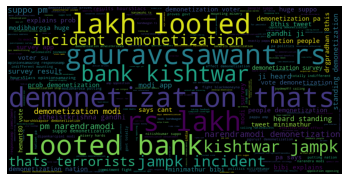

In [ ]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

##Spelling Correction
In this section, we are correcting the spelling of each words.

In [ ]:
from textblob import TextBlob

In [ ]:
x = 'tanks forr waching this vidio mna'

In [ ]:
x = TextBlob(x).correct()

In [ ]:
x

TextBlob("tanks for watching this video man")

##Tokenization
Tokenization is all about breaking the sentences into individual words.

In [ ]:
x = 'thanks#watching this video. please like it'

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


##Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [ ]:
x = 'runs run running ran'

In [ ]:
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [ ]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


In [ ]:
import requests

In [ ]:
api=requests.get('https://jsonplaceholder.typicode.com/todos/1')

In [ ]:
api.text

'{\n  "userId": 1,\n  "id": 1,\n  "title": "delectus aut autem",\n  "completed": false\n}'

In [ ]:
lst=[2,3,4,5,6,7]
abc=(lambda x: (x*x)>16)
#newlist=list(map(lambda x: x*x ,lst))
newabc=list(map(abc,lst))
#print(newlist)
print(newabc)
print(type(newabc))

[False, False, False, True, True, True]
<class 'list'>


In [ ]:
lmn=abc

In [ ]:
lstt=[2,3,4,5,6,7,8,9,10]
newlist2=list(filter(lambda,lstt)) filter
print(newlist2)


[5, 6, 7, 8, 9, 10]


In [ ]:
logs="""11-30 09:18:21.585 32643   381 W Calling: CallManager: ProcessId: 32643, Thread: pool-1-thread-1, getUserObjectIdForCall called from handleNetworkConnectivityChanged, Unable to find user for call ID 0, guid: 
11-30 09:18:21.587 32643   454 I AuthorizationService: ProcessId: 32643, Thread: pool-1-thread-8, AuthenticateUser: Queued.
11-30 09:18:21.587 32643   454 I AuthorizationService: ProcessId: 32643, Thread: pool-1-thread-8, AuthenticateUser: Start.
11-30 09:18:21.588 32643   454 I AuthorizationService: ProcessId: 32643, Thread: pool-1-thread-8, AuthenticateUser: Can't reuse the pending auth request. Creating a new one.
11-30 09:18:21.589 32643   488 I AuthorizationService: ProcessId: 32643, Thread: Pool-Auth-Thread-1, executeAuthRequest() TaskUtilities.runOnBackgroundThread() network state: true
11-30 09:18:21.589 32643   488 I AuthorizationService: ProcessId: 32643, Thread: Pool-Auth-Thread-1, AuthenticateUser: notify success
11-30 09:18:21.606 32643   489 D ConnectivityManager: requestNetwork; CallingUid : 10228, CallingPid : 32643
11-30 09:18:21.617 32643   492 E DaggerWorkerFactory: ProcessId: 32643, Thread: pool-14-thread-4, Provider is null
11-30 09:18:21.627 32643   493 E DaggerWorkerFactory: ProcessId: 32643, Thread: Pool-WorkManager-Thread-1, Provider is null
11-30 09:18:21.751 32643   493 D ConnectivityManager: requestNetwork; CallingUid : 10228, CallingPid : 32643
11-30 09:18:21.753 32643   495 I BackgroundSyncServiceWorker: ProcessId: 32643, Thread: Pool-WorkManager-Thread-2, Start background sync service worker
11-30 09:18:21.754  3589  3930 D Ethernet: got request NetworkRequest [ id=3904, legacyType=-1, [ Capabilities: INTERNET&NOT_RESTRICTED&TRUSTED&NOT_VPN] ] with score 100
"""

In [ ]:
xl=logs.splitlines()

In [ ]:
list_1=[]
list_2=[]
list_3=[]
list_4=[]
list_5=[]
for i in range(len(xl)):
    words=xl[i].split()
    list_1.append(words[0])
    list_2.append(words[1])
    list_3.append(words[2])
    list_4.append(words[3])
    list_5.append(words[4])
print(list_1)
print(list_2)
print(list_3)
print(list_4)
print(list_5)



['11-30', '11-30', '11-30', '11-30', '11-30', '11-30', '11-30', '11-30', '11-30', '11-30', '11-30', '11-30']
['09:18:21.585', '09:18:21.587', '09:18:21.587', '09:18:21.588', '09:18:21.589', '09:18:21.589', '09:18:21.606', '09:18:21.617', '09:18:21.627', '09:18:21.751', '09:18:21.753', '09:18:21.754']
['32643', '32643', '32643', '32643', '32643', '32643', '32643', '32643', '32643', '32643', '32643', '3589']
['381', '454', '454', '454', '488', '488', '489', '492', '493', '493', '495', '3930']
['W', 'I', 'I', 'I', 'I', 'I', 'D', 'E', 'E', 'D', 'I', 'D']


In [ ]:
!pip install tweepy
import tweepy

In [ ]:
consumer_key = "SaMSYfPnpQXsgeEFywA8pLg1C"
consumer_secret = "o9BjVfJHhxWmPOAT39f7i0KHJuwGb8r9k1VjHQvl4q51Gaz5I5"
access_token = "2238923408-XqfhQ40evLEZSVDUYAlZmLJF6IJXR0SCtp04Xy7"
access_token_secret = "BKqoLg2YglIqm0txjSI9oahhecxWox6a4q7g66iQe5ZvA"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)